In [1]:

list_of_packages <- c("ggplot2", "dplyr", "DESeq2","biomaRt","tidyr")
for(package in list_of_packages){
suppressPackageStartupMessages(suppressMessages(suppressWarnings(library(package,character.only=TRUE))))
}

In [2]:
gsdm_genes <- c(
    "GSDMD",
    "GSDME"
)

In [3]:
all_gtex_tissue_data <- file.path("../data/genes_of_interest_gtex_tissue_data.tsv")
gtex_df <- read.table(all_gtex_tissue_data, header = TRUE, sep = "\t")
# trim the decimals in Ensembl
gtex_df$Ensembl <- gsub("\\..*", "", gtex_df$Ensembl)
head(gtex_df)

,geneID,Ensembl,transcript_length,Sample,expression,tissue,fpkm
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>
1,CASP1,ENSG00000137752,1693,GTEX.1117F.0226.SM.5GZZ7,300,adipose_subcutaneous,0.1772002
2,CASP1,ENSG00000137752,1693,GTEX.111CU.1826.SM.5GZYN,1155,adipose_subcutaneous,0.6822209
3,CASP1,ENSG00000137752,1693,GTEX.111FC.0226.SM.5N9B8,1382,adipose_subcutaneous,0.8163024
4,CASP1,ENSG00000137752,1693,GTEX.111VG.2326.SM.5N9BK,1615,adipose_subcutaneous,0.9539279
5,CASP1,ENSG00000137752,1693,GTEX.111YS.2426.SM.5GZZQ,585,adipose_subcutaneous,0.3455405
6,CASP1,ENSG00000137752,1693,GTEX.1122O.2026.SM.9YFMG,1317,adipose_subcutaneous,0.7779090


In [4]:
gsdm_df <- gtex_df[gtex_df$geneID %in% gsdm_genes,]
gsdm_df$geneID <- factor(gsdm_df$geneID, levels = gsdm_genes)
head(gsdm_df)

,geneID,Ensembl,transcript_length,Sample,expression,tissue,fpkm
,<fct>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>
110671,GSDMD,ENSG00000104518,442,GTEX.1117F.0226.SM.5GZZ7,2394,adipose_subcutaneous,5.416290
110672,GSDMD,ENSG00000104518,442,GTEX.111CU.1826.SM.5GZYN,3968,adipose_subcutaneous,8.977376
110673,GSDMD,ENSG00000104518,442,GTEX.111FC.0226.SM.5N9B8,4571,adipose_subcutaneous,10.341629
110674,GSDMD,ENSG00000104518,442,GTEX.111VG.2326.SM.5N9BK,3935,adipose_subcutaneous,8.902715
110675,GSDMD,ENSG00000104518,442,GTEX.111YS.2426.SM.5GZZQ,2709,adipose_subcutaneous,6.128959
110676,GSDMD,ENSG00000104518,442,GTEX.1122O.2026.SM.9YFMG,5063,adipose_subcutaneous,11.454751


In [5]:
# get the mean fpkm of each gene in each tissue across all samples
gsdm_df <- gsdm_df %>% 
  group_by(geneID, tissue) %>% 
  summarise(mean_fpkm = mean(fpkm), sd_fpkm = sd(fpkm)) %>%
  ungroup()
head(gtex_df)

`summarise()` has grouped output by 'geneID'. You can override using the
`.groups` argument.


,geneID,Ensembl,transcript_length,Sample,expression,tissue,fpkm
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>
1,CASP1,ENSG00000137752,1693,GTEX.1117F.0226.SM.5GZZ7,300,adipose_subcutaneous,0.1772002
2,CASP1,ENSG00000137752,1693,GTEX.111CU.1826.SM.5GZYN,1155,adipose_subcutaneous,0.6822209
3,CASP1,ENSG00000137752,1693,GTEX.111FC.0226.SM.5N9B8,1382,adipose_subcutaneous,0.8163024
4,CASP1,ENSG00000137752,1693,GTEX.111VG.2326.SM.5N9BK,1615,adipose_subcutaneous,0.9539279
5,CASP1,ENSG00000137752,1693,GTEX.111YS.2426.SM.5GZZQ,585,adipose_subcutaneous,0.3455405
6,CASP1,ENSG00000137752,1693,GTEX.1122O.2026.SM.9YFMG,1317,adipose_subcutaneous,0.7779090


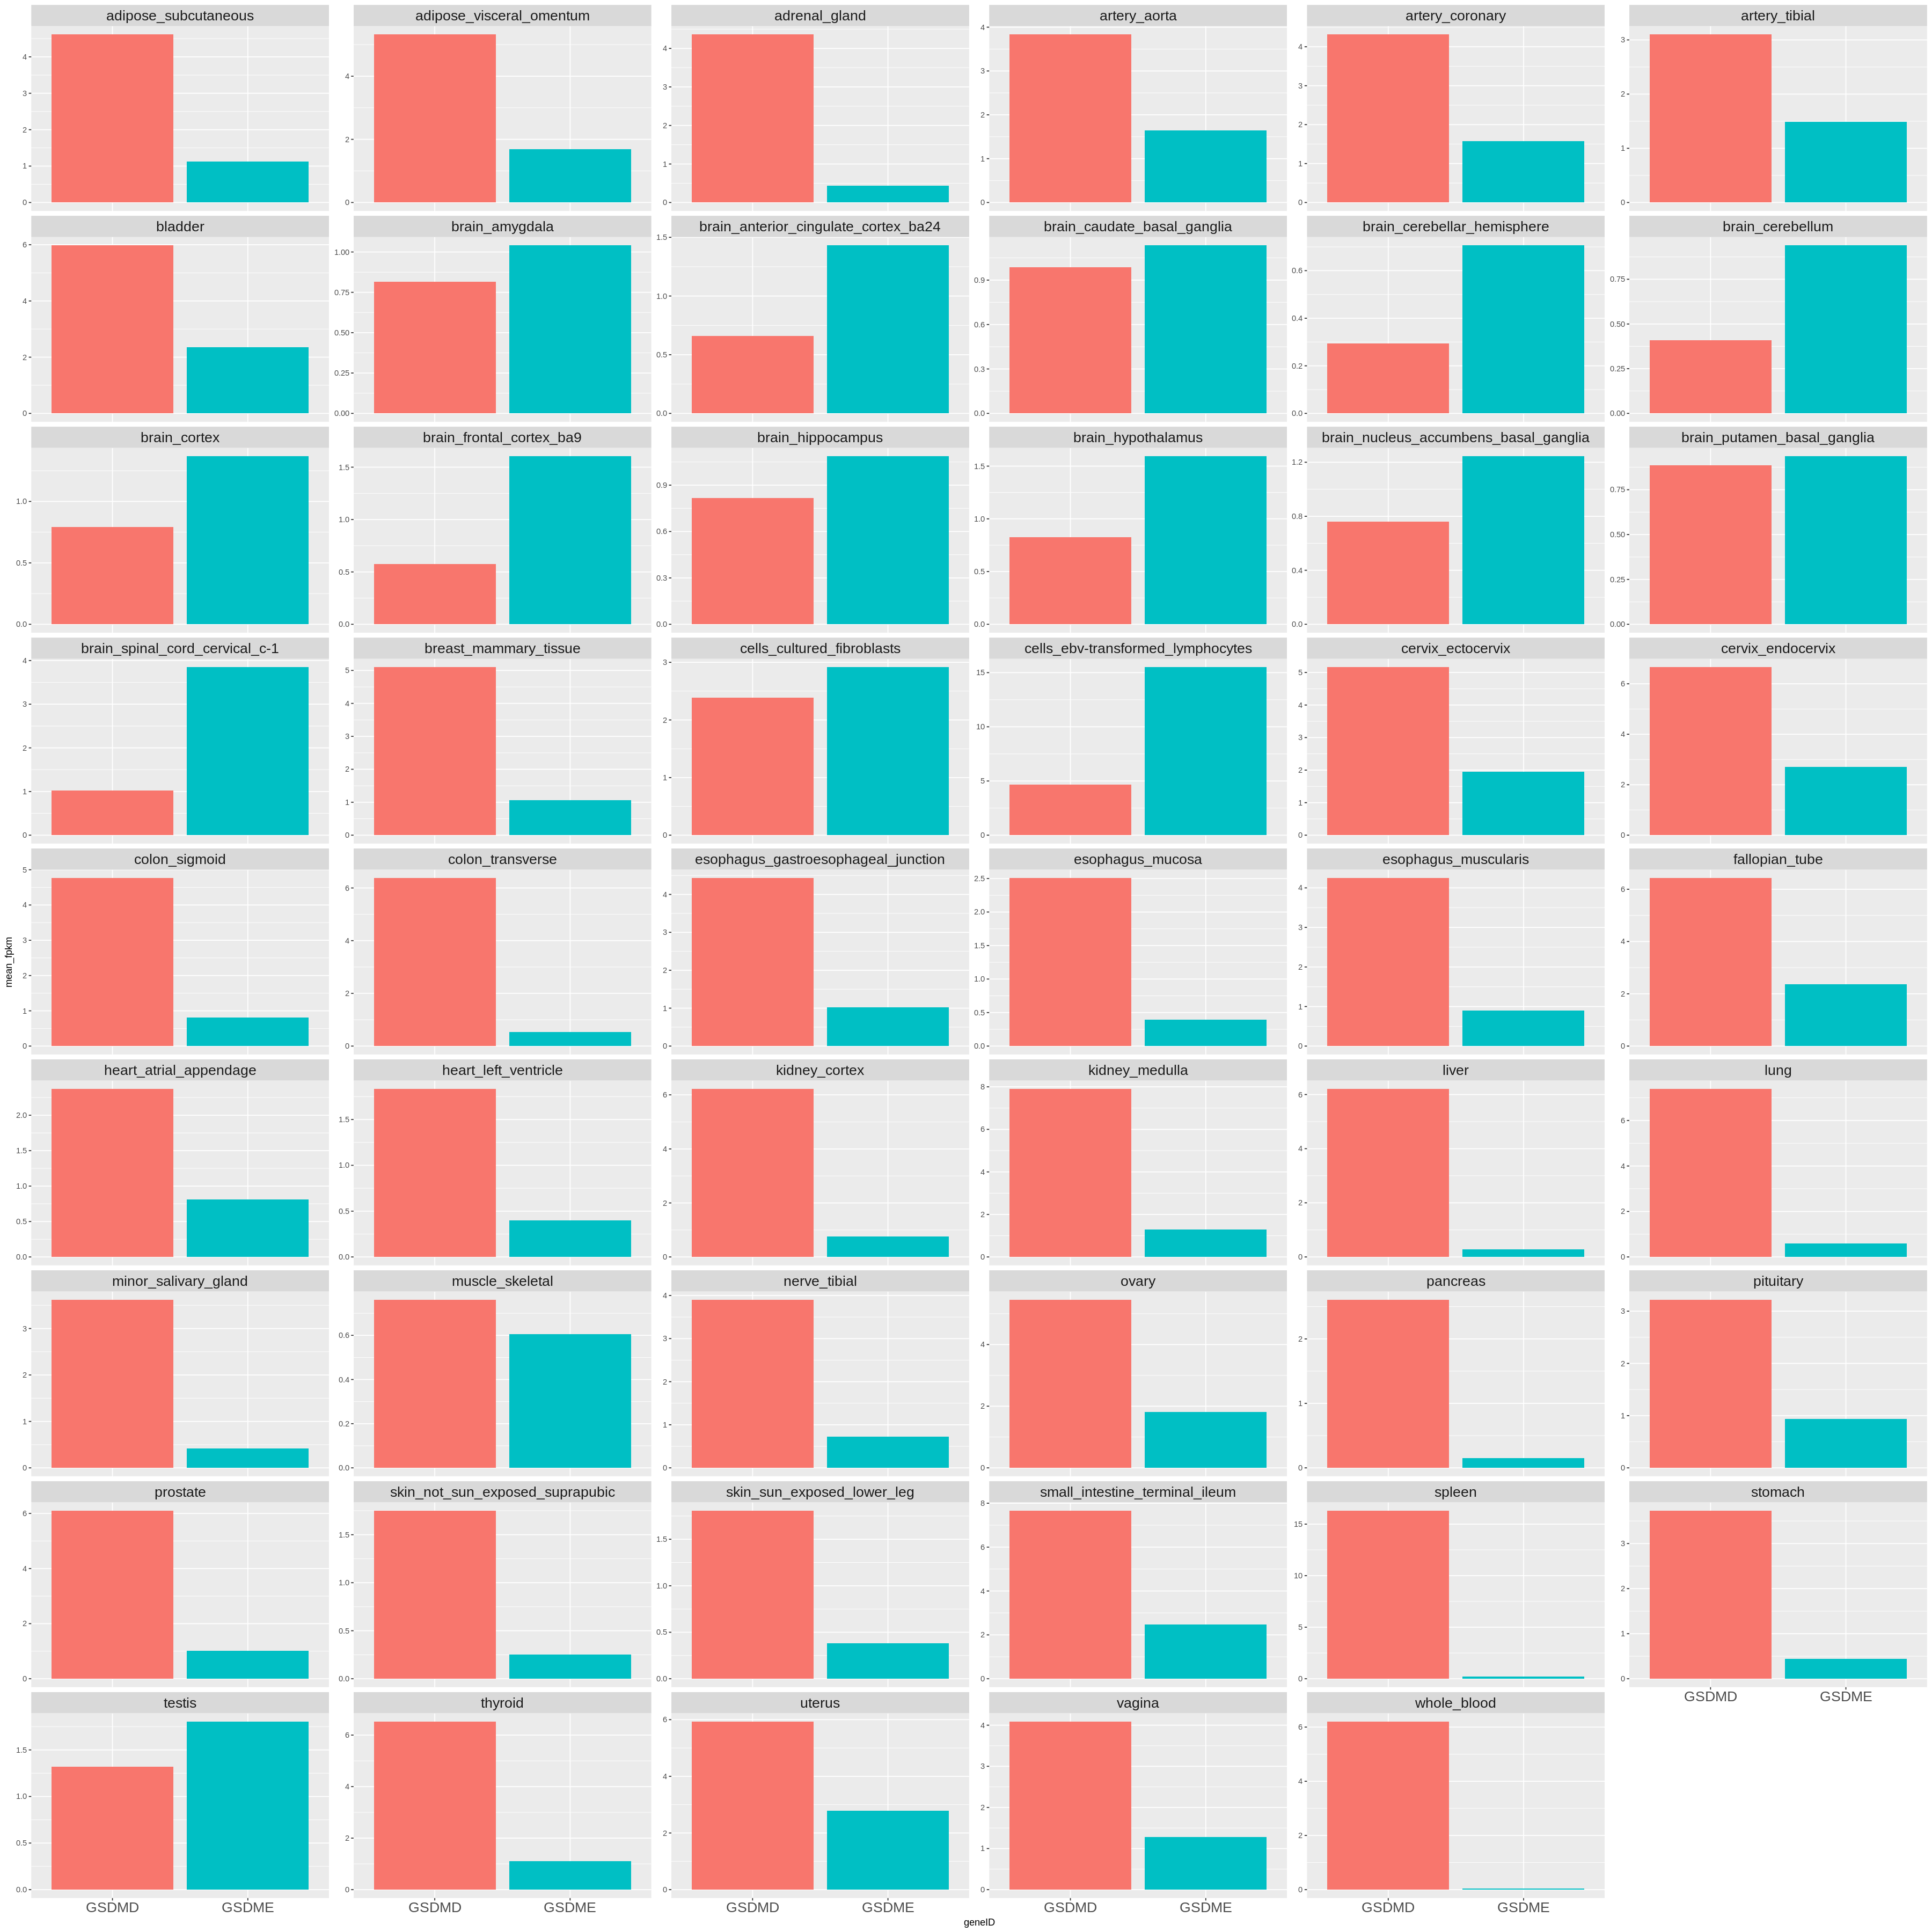

In [6]:
width <- 30
height <- 30
options(repr.plot.width = width, repr.plot.height = height)
gsdm_plot <- (
    ggplot(gsdm_df, aes(x = geneID, y = mean_fpkm, fill = geneID))
    + geom_bar(stat = "identity", position = "dodge")
    + facet_wrap(~tissue, nrow= 10, scales = "free_y")
    + theme(legend.position = "none")
    + theme(strip.text = element_text(size = 16))
    + theme(axis.text.x = element_text(size = 16)))
# save the plot
ggsave("../figures/gtex_gsdm_expression_by_tissue.png", gsdm_plot, width = width, height = height, units = "in")
gsdm_plot

In [7]:
tlr_and_casp_genes <- c(
 "TLR4",
 "TLR5",
 "CASP1",
 "CASP3",
 "CASP7",
 "CASP11"
)
casp_df <- gtex_df[gtex_df$geneID %in% tlr_and_casp_genes,]
head(casp_df)

,geneID,Ensembl,transcript_length,Sample,expression,tissue,fpkm
,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>
1,CASP1,ENSG00000137752,1693,GTEX.1117F.0226.SM.5GZZ7,300,adipose_subcutaneous,0.1772002
2,CASP1,ENSG00000137752,1693,GTEX.111CU.1826.SM.5GZYN,1155,adipose_subcutaneous,0.6822209
3,CASP1,ENSG00000137752,1693,GTEX.111FC.0226.SM.5N9B8,1382,adipose_subcutaneous,0.8163024
4,CASP1,ENSG00000137752,1693,GTEX.111VG.2326.SM.5N9BK,1615,adipose_subcutaneous,0.9539279
5,CASP1,ENSG00000137752,1693,GTEX.111YS.2426.SM.5GZZQ,585,adipose_subcutaneous,0.3455405
6,CASP1,ENSG00000137752,1693,GTEX.1122O.2026.SM.9YFMG,1317,adipose_subcutaneous,0.7779090


In [8]:
# get the mean fpkm of each gene in each tissue across all samples
casp_df <- casp_df %>% 
  group_by(geneID, tissue) %>% 
  summarise(mean_fpkm = mean(fpkm), sd_fpkm = sd(fpkm)) %>%
  ungroup()
head(casp_df)

`summarise()` has grouped output by 'geneID'. You can override using the
`.groups` argument.


geneID,tissue,mean_fpkm,sd_fpkm
<chr>,<chr>,<dbl>,<dbl>
CASP1,adipose_subcutaneous,1.0678402,1.0729201
CASP1,adipose_visceral_omentum,1.4023012,1.3919858
CASP1,adrenal_gland,0.5849769,0.5599008
CASP1,artery_aorta,0.5428377,0.5703209
CASP1,artery_coronary,0.9636731,1.1278294
CASP1,artery_tibial,0.3481900,0.5923482


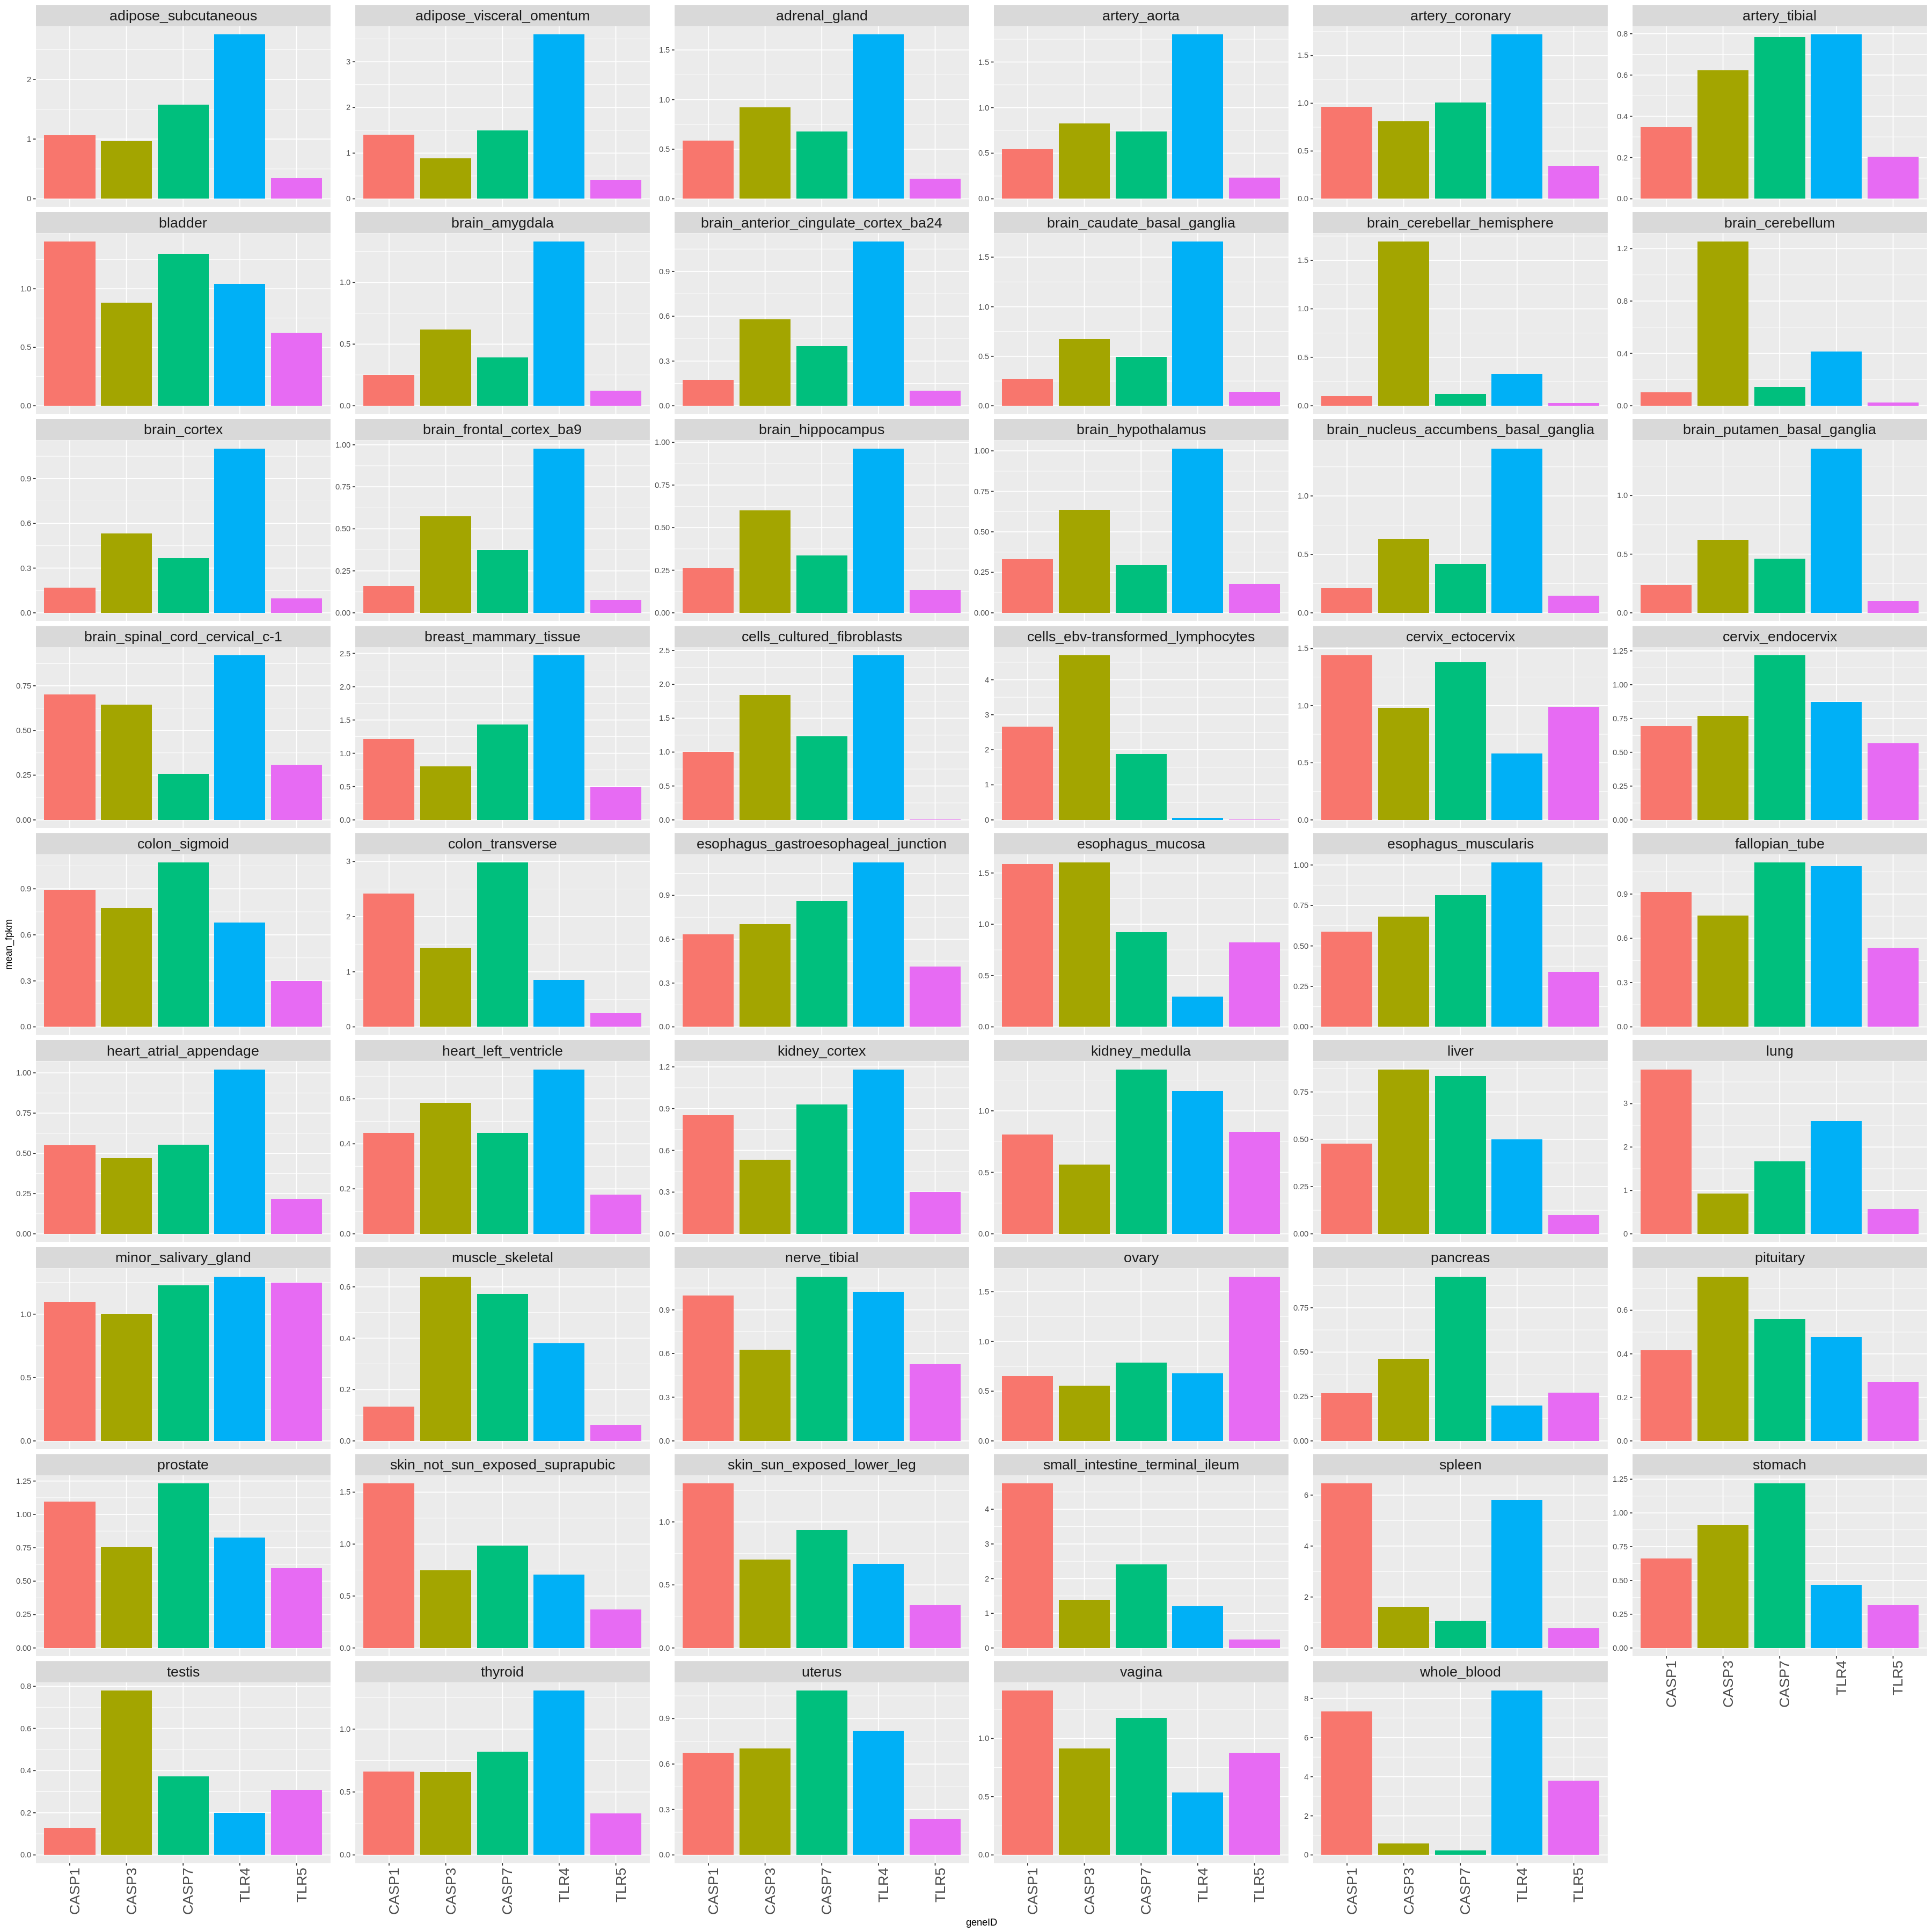

In [9]:
casp_plot <- (
    ggplot(casp_df, aes(x = geneID, y = mean_fpkm, fill = geneID))
    + geom_bar(stat = "identity", position = "dodge")
    + facet_wrap(~tissue, nrow= 10, scales = "free_y")
    # rotate the x-axis labels
    + theme(axis.text.x = element_text(angle = 90, hjust = 1))
    # hide the legend
    + theme(legend.position = "none")
    + theme(strip.text = element_text(size = 16))
    + theme(axis.text.x = element_text(size = 16)))
casp_plot
# save the plot
ggsave("../figures/gtex_casp_tlr_expression_by_tissue.png", casp_plot, width = width, height = height, units = "in")